In [1]:
import numpy as np
import matplotlib.pyplot as plt


train_n = 100
test_n = 1000
d = 100

In [ ]:
# Initializing the dawta

def initialize():
    X_train = np.random.normal(0,1, size=(train_n,d))
    w_true = np.random.normal(0,1, size=(d,1))
    y_train = X_train.dot(w_true) + np.random.normal(0,0.5,size=(train_n,1))
    X_test = np.random.normal(0,1, size=(test_n,d))
    y_test = X_test.dot(w_true) + np.random.normal(0,0.5,size=(test_n,1))
    return X_train, y_train, X_test, y_test, w_true

In [ ]:
# Question 3.1

train_error = np.zeros(10)
test_error = np.zeros(10)

for i in range(10):
    X_train, y_train, X_test, y_test, w_true = initialize()

    # least squares solution w = (X^T X)^-1 X^T y
    w_ls = np.linalg.inv(X_train) @ (y_train)
    # normalized training and test errors:
    train_error[i] = np.linalg.norm(X_train.dot(w_ls) - y_train)/np.linalg.norm(y_train)
    test_error[i] = np.linalg.norm(X_test.dot(w_ls) - y_test)/np.linalg.norm(y_test)

# print("Training errors: ", train_error)
# print("Test errors: ", test_error)
print("Average training error: ", np.mean(train_error))
print("Average test error: ", np.mean(test_error))

In [ ]:
# Question 3.2
# l2 regularitzaion with eig = 0.0005

eig_choice = np.array([0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 5, 50,500])

train_error_all = np.zeros(eig_choice.shape)
test_error_all = np.zeros(eig_choice.shape)

for index, eig in enumerate(eig_choice):
    train_error_eig = np.zeros(10)
    test_error_eig = np.zeros(10)

    for i in range(10):
        X_train, y_train, X_test, y_test, w_true = initialize()

        #ls solution w/ l2 regularization: w = (X^T X + eig I)^-1 X^T y
        w_ls = np.linalg.inv(X_train.T.dot(X_train) + eig * np.identity(d)).dot(X_train.T).dot(y_train)
        # normalize errors as in 3.1
        train_error_eig[i] = np.linalg.norm(X_train.dot(w_ls) - y_train)/np.linalg.norm(y_train)
        test_error_eig[i] = np.linalg.norm(X_test.dot(w_ls) - y_test)/np.linalg.norm(y_test)

    # print("Training errors: ", train_error)
    # print("Test errors: ", test_error)
    
    train_error_all[index] = np.mean(train_error_eig)
    test_error_all[index] = np.mean(test_error_eig)


# print a table showing training and test errors for each value of eig
print("Lambda ‖ Train Error ‖ Test Error")
for index, eig in enumerate(eig_choice):
    print("{:.3f}\t{:.3f}\t\t {:.3f}".format(eig, train_error_all[index], test_error_all[index]))



plt.plot(eig_choice, train_error_all, label="Training error")
plt.plot(eig_choice, test_error_all, label="Test error")
plt.xscale('log')
plt.xlabel("Lambda")
plt.ylabel("Error")
plt.legend()
plt.show()

In [ ]:
# Question 3.3
# SGD as implicit regularization
# initialize w = 0; run SDG on f(w) = sum (w^T x_i - y_i)^2
# gradient for ith component is 2x_i^T (w^T x_i - y_i)
# 1mil iterations


eta_choice = np.array([0.00005, 0.0005, 0.005])
train_error_all = np.zeros(eta_choice.shape)
test_error_all = np.zeros(eta_choice.shape)

train_error_ls_all = np.zeros(eta_choice.shape)
test_error_ls_all = np.zeros(eta_choice.shape)

train_error_reg_all = np.zeros(eta_choice.shape)
test_error_reg_all = np.zeros(eta_choice.shape)


for index, eta in enumerate(eta_choice):
    train_error_eta = np.zeros(10)
    test_error_eta = np.zeros(10)

    # non-regularized least squares
    train_error_ls = np.zeros(10)
    test_error_ls = np.zeros(10)

    # regularized least squares
    train_error_reg = np.zeros(10)
    test_error_reg = np.zeros(10)

    for i in range(10):
        X_train, y_train, X_test, y_test, w_true = initialize()

        w = np.zeros((d,1))

        # these are just stuff in 3.1 and 3.2
        w_ls = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        w_ls_reg = np.linalg.inv(X_train.T.dot(X_train) + eta * np.identity(d)).dot(X_train.T).dot(y_train)

        train_error_ls[i] = np.linalg.norm(X_train.dot(w_ls) - y_train)/np.linalg.norm(y_train)
        test_error_ls[i] = np.linalg.norm(X_test.dot(w_ls) - y_test)/np.linalg.norm(y_test)

        train_error_reg[i] = np.linalg.norm(X_train.dot(w_ls_reg) - y_train)/np.linalg.norm(y_train)
        test_error_reg[i] = np.linalg.norm(X_test.dot(w_ls_reg) - y_test)/np.linalg.norm(y_test)
        

        # do SGD 1mil times
        for iter in range(10**6):
            # pick a random index sgd_index
            sgd_index = np.random.randint(0,train_n)
            # update w by gradient: w = w - eta * 2x_i (w^T x_i - y_i)
            w = w - eta * 2 * X_train[sgd_index].reshape(d,1) * (X_train[sgd_index].dot(w) - y_train[sgd_index])
           
        
        # normalize errors as in 3.1
        train_error_eta[i] = np.linalg.norm(X_train.dot(w) - y_train)/np.linalg.norm(y_train)
        test_error_eta[i] = np.linalg.norm(X_test.dot(w) - y_test)/np.linalg.norm(y_test)

    
    train_error_all[index] = np.mean(train_error_eta)
    test_error_all[index] = np.mean(test_error_eta)

    train_error_ls_all[index] = np.mean(train_error_ls)
    test_error_ls_all[index] = np.mean(test_error_ls)

    train_error_reg_all[index] = np.mean(train_error_reg)
    test_error_reg_all[index] = np.mean(test_error_reg)


print("Results w.r.t. eta = 0.00005, 0.0005, and 0.05, with average over 10 runs each, and 10^6 iterations on SDG:")
print(" ---------------- Results on training set ---------------- ")
print("SGD training errors ‖ ", train_error_all)
print("LS training errors  ‖ ", train_error_ls_all)
print("Ridge training errors ‖ ", train_error_reg_all)
print(" ---------------- Results on test set ---------------- ")
print("SGD test errors ‖  ", test_error_all)
print("LS test errors ‖ ", test_error_ls_all)
print("Ridge test errors ‖ ", test_error_reg_all)

In [ ]:
# Question 3.4

eta_choice = np.array([0.00005,0.005])
num_iter = 10**6


# For this one, I assumed, based on the problem set's instruction, that I need to compute LS and ridge for each run to make the results consistent.


train_error_all = np.zeros((eta_choice.shape[0], num_iter//1000))
test_error_all = np.zeros((eta_choice.shape[0], num_iter//1000))
w_norm_all = np.zeros((eta_choice.shape[0], num_iter//1000))

true_train_error_all = np.zeros(eta_choice.shape[0])
true_test_error_all = np.zeros(eta_choice.shape[0])
true_w_norm_all = np.zeros(eta_choice.shape[0])

for index, eta in enumerate(eta_choice):
    X_train, y_train, X_test, y_test, w_true = initialize()

    w = np.zeros((d,1))

    true_train_error_all[index] = np.linalg.norm(X_train.dot(w_true) - y_train)/np.linalg.norm(y_train)
    true_test_error_all[index] = np.linalg.norm(X_test.dot(w_true) - y_test)/np.linalg.norm(y_test)
    true_w_norm_all[index] = np.linalg.norm(w_true)

    for iter in range(num_iter):
        # pick a random index sgd_index
        sgd_index = np.random.randint(0,train_n)
        # update w by gradient: w = w - eta * 2x_i (w^T x_i - y_i)
        w = w - eta * 2 * X_train[sgd_index].reshape(d,1) * (X_train[sgd_index].dot(w) - y_train[sgd_index])
        if iter % 1000 == 0:
            train_error_all[index][iter//1000] = np.linalg.norm(X_train.dot(w) - y_train)/np.linalg.norm(y_train)
            test_error_all[index][iter//1000] = np.linalg.norm(X_test.dot(w) - y_test)/np.linalg.norm(y_test)
            w_norm_all[index][iter//1000] = np.linalg.norm(w)

# plot everything
plt.figure()
for index, eta in enumerate(eta_choice):
    # (i): plot training error
    '''
    plt.plot(np.arange(num_iter//1000), train_error_all[index], label="Training error, eta = " + str(eta))
    # draw horizontal line at true training error
    plt.axhline(y=true_train_error_all[index], color = 'r' if index == 0 else 'b', linestyle='dotted', label="True training error, eta = " + str(eta))
    plt.title("Training error vs. number of iterations")
    plt.ylabel("Normalized training error")
    plt.ylim(0,0.3)

    '''
    # (2): plot test error
    plt.plot(np.arange(num_iter//1000), test_error_all[index], label="Test error, eta = " + str(eta))
    # draw horizontal line at true test error
    # plt.axhline(y=true_test_error_all[index], color = 'r' if index == 0 else 'b', linestyle='dotted', label="True test error, eta = " + str(eta))
    plt.title("Test error vs. number of iterations")
    plt.ylabel("Normalized test error")

    '''
    # (3): plot w norm
    plt.plot(np.arange(num_iter//1000), w_norm_all[index], label="w norm, eta = " + str(eta))
    # draw horizontal line at true w norm
    plt.axhline(y=true_w_norm_all[index], color = 'r' if index == 0 else 'b', linestyle='dotted', label="True w norm, eta = " + str(eta))
    plt.title("w norm vs. number of iterations")
    plt.ylabel("L2 norm of w")
    '''
plt.xlabel("Number of iterations, x1000")
plt.legend()


In [ ]:
# Question 3.5

def random_start(r):
    # randomly from bonudary of r * N(0,I) 
    return np.random.normal(0,1, size=(d,1)) / np.linalg.norm(np.random.normal(0,1, size=(d,1))) * r

eta = 0.00005
num_iter = 10**6

r_choice = np.array([0.1, 0.5, 1, 10, 20, 30])

train_error_all = np.zeros(r_choice.shape[0])
test_error_all = np.zeros(r_choice.shape[0])


for index, radius in enumerate(r_choice):
    train_error = np.zeros(10)
    test_error = np.zeros(10)

    for i in range(10):
        X_train, y_train, X_test, y_test, w_true = initialize()

        w = random_start(radius)

        for iter in range(num_iter):
            # pick a random index sgd_index
            sgd_index = np.random.randint(0,train_n)
            w = w - eta * 2 * X_train[sgd_index].reshape(d,1) * (X_train[sgd_index].dot(w) - y_train[sgd_index])

        train_error[i] = np.linalg.norm(X_train.dot(w) - y_train)/np.linalg.norm(y_train)
        test_error[i] = np.linalg.norm(X_test.dot(w) - y_test)/np.linalg.norm(y_test)
    
    train_error_all[index] = np.mean(train_error)
    test_error_all[index] = np.mean(test_error)

plt.figure()
r_choice_str = ['0.1', '0.5', '1', '10', '20', '30']
plt.plot(r_choice_str, train_error_all, label="Training error")
plt.plot(r_choice_str, test_error_all, label="Test error")
plt.title("Training and test error vs. radius")
plt.ylabel("Normalized error")
plt.xlabel("Radius")
# convert r_choice to string 
plt.xticks(r_choice_str)
plt.legend()
plt.show()


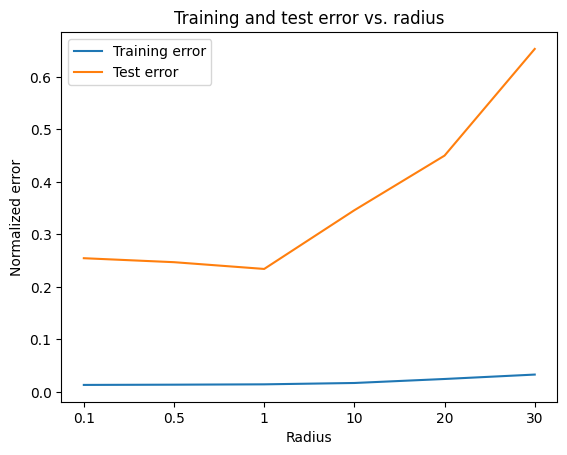

In [7]:
# Question 3.5

def random_start(r):
    # randomly from bonudary of r * N(0,I) 
    return np.random.normal(0,1, size=(d,1)) / np.linalg.norm(np.random.normal(0,1, size=(d,1))) * r

eta = 0.00005
num_iter = 10**6

r_choice = np.array([0.1, 0.5, 1, 10, 20, 30])

train_error_all = np.zeros(r_choice.shape[0])
test_error_all = np.zeros(r_choice.shape[0])


for index, radius in enumerate(r_choice):
    train_error = np.zeros(10)
    test_error = np.zeros(10)

    for i in range(10):
        X_train, y_train, X_test, y_test, w_true = initialize()

        w = random_start(radius)

        for iter in range(num_iter):
            # pick a random index sgd_index
            sgd_index = np.random.randint(0,train_n)
            w = w - eta * 2 * X_train[sgd_index].reshape(d,1) * (X_train[sgd_index].dot(w) - y_train[sgd_index])

        train_error[i] = np.linalg.norm(X_train.dot(w) - y_train)/np.linalg.norm(y_train)
        test_error[i] = np.linalg.norm(X_test.dot(w) - y_test)/np.linalg.norm(y_test)
    
    train_error_all[index] = np.mean(train_error)
    test_error_all[index] = np.mean(test_error)

plt.figure()
r_choice_str = ['0.1', '0.5', '1', '10', '20', '30']
plt.plot(r_choice_str, train_error_all, label="Training error")
plt.plot(r_choice_str, test_error_all, label="Test error")
plt.title("Training and test error vs. radius")
plt.ylabel("Normalized error")
plt.xlabel("Radius")
# convert r_choice to string 
plt.xticks(r_choice_str)
plt.legend()
plt.show()
